# Customer Segmentation

### 1. Load and Inspect Data

In [32]:
# Complete K-Means Example with Customer Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")


customer_data = pd.read_csv("customer_data.csv")
customer_data.head()

,Unnamed: 0,Age,Income,Spending,Frequency,Recency,Cluster
0,0,-6.736004,-3.747759,-0.006080,-0.074010,-4.887976,0
1,1,-5.831792,-5.111397,0.719563,-0.624498,-4.901202,0
2,2,-5.879905,-3.686460,1.268980,-0.957191,-4.258491,0
3,3,-10.404224,9.845949,7.036143,-4.455265,-6.548168,3
4,4,-7.453434,-9.802196,7.445601,1.568490,3.308099,2


In [33]:
customer_data.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [34]:
customer_data.head()

,Age,Income,Spending,Frequency,Recency,Cluster
0,-6.736004,-3.747759,-0.006080,-0.074010,-4.887976,0
1,-5.831792,-5.111397,0.719563,-0.624498,-4.901202,0
2,-5.879905,-3.686460,1.268980,-0.957191,-4.258491,0
3,-10.404224,9.845949,7.036143,-4.455265,-6.548168,3
4,-7.453434,-9.802196,7.445601,1.568490,3.308099,2


### 2. Data Preprocessing and Scaling

In [35]:
customer_data.shape

(300, 6)

In [36]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        300 non-null    float64
 1   Income     300 non-null    float64
 2   Spending   300 non-null    float64
 3   Frequency  300 non-null    float64
 4   Recency    300 non-null    float64
 5   Cluster    300 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 14.2 KB


In [37]:
customer_data.describe()

,Age,Income,Spending,Frequency,Recency,Cluster
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,-6.325403,1.435824,4.815939,-0.695894,-3.316520,1.500000
std,2.654283,8.068415,2.756613,3.165431,4.466549,1.119902
min,-11.326063,-10.078793,-0.624793,-6.749794,-8.050880,0.000000
25%,-8.310851,-5.659117,3.268222,-3.103442,-6.597682,0.750000
50%,-6.673526,2.252916,5.716046,0.183268,-5.354188,1.500000
75%,-4.528813,9.242200,7.015644,1.956335,-1.324982,2.250000
max,-1.377486,10.871377,9.170851,4.284809,5.740881,3.000000


In [38]:
customer_data.duplicated().sum()

0

In [39]:
customer_data.isna().sum()

Age          0
Income       0
Spending     0
Frequency    0
Recency      0
Cluster      0
dtype: int64

### 3. Scaling

In [40]:
# Scale the features (CRITICAL for K-Means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data)

print("Original data stats:")
print(customer_data.describe())
print("\nScaled data stats:")
print(pd.DataFrame(scaled_data, columns=customer_data.columns).describe())

Original data stats:
              Age      Income    Spending   Frequency     Recency     Cluster
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000
mean    -6.325403    1.435824    4.815939   -0.695894   -3.316520    1.500000
std      2.654283    8.068415    2.756613    3.165431    4.466549    1.119902
min    -11.326063  -10.078793   -0.624793   -6.749794   -8.050880    0.000000
25%     -8.310851   -5.659117    3.268222   -3.103442   -6.597682    0.750000
50%     -6.673526    2.252916    5.716046    0.183268   -5.354188    1.500000
75%     -4.528813    9.242200    7.015644    1.956335   -1.324982    2.250000
max     -1.377486   10.871377    9.170851    4.284809    5.740881    3.000000

Scaled data stats:
                Age        Income      Spending     Frequency       Recency  \
count  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02   
mean  -2.546111e-16 -5.921189e-18 -2.176037e-16 -1.776357e-17  2.960595e-18   
std    1.001671e+00 

### 4. Finding Optimal K using Elbow Method and Silhouette Analysis

In [41]:
# Elbow Method
wcss = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

print("Silhouette Scores:")
for k, score in zip(k_range, silhouette_scores):
    print(f"K={k}: {score:.3f}")

Silhouette Scores:
K=2: 0.510
K=3: 0.704
K=4: 0.847
K=5: 0.703
K=6: 0.540
K=7: 0.378
K=8: 0.222
K=9: 0.221
K=10: 0.214


#### Visualize

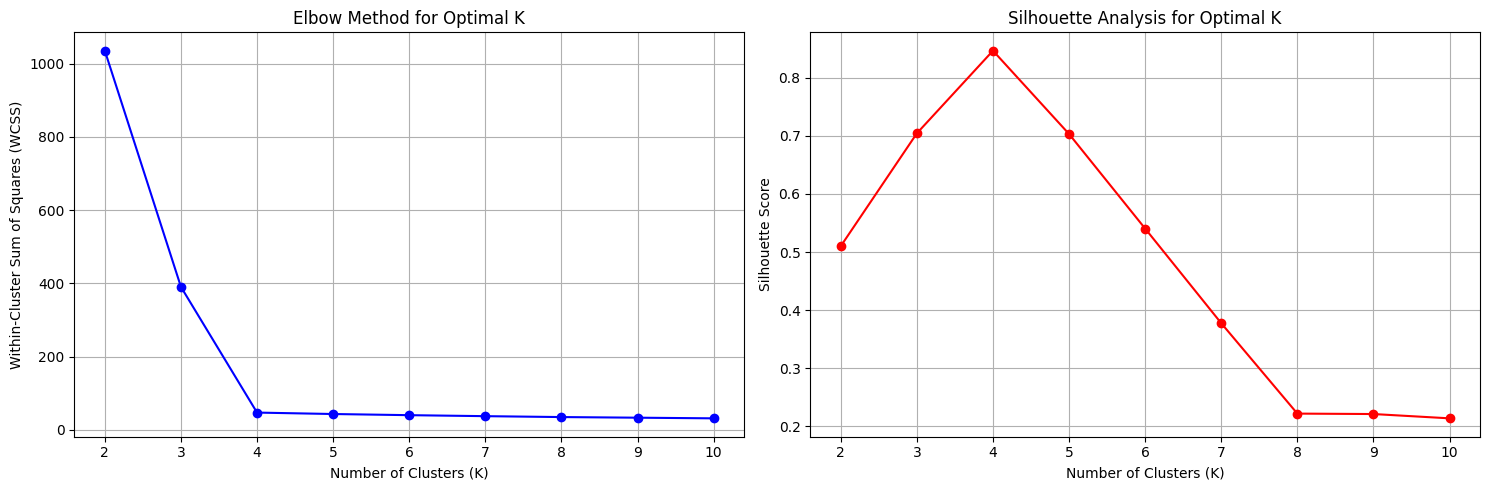

In [42]:
# Plot elbow curve and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Elbow plot
ax1.plot(k_range, wcss, 'bo-')
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)')
ax1.set_title('Elbow Method for Optimal K')
ax1.grid(True)

# Silhouette score plot
ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (K)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis for Optimal K')
ax2.grid(True)

plt.tight_layout()
plt.show()



### 5. Apply K-Means with Optimal K

In [43]:
# Choose optimal K (based on plots)
optimal_k = 4  # You would choose based on elbow and silhouette

# Apply K-Means with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
clusters = kmeans.fit_predict(scaled_data)

# Add clusters to original data
customer_data['Cluster'] = clusters
customer_data['Cluster'] = customer_data['Cluster'].astype('category')

print("Cluster sizes:")
print(customer_data['Cluster'].value_counts().sort_index())

Cluster sizes:
Cluster
0    75
1    75
2    75
3    75
Name: count, dtype: int64


### 6. Visualize Clusters using PCA

#### Reduce to 2D for visualization


In [44]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

#### Create DataFrame for plotting


In [45]:
plot_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
plot_df['Cluster'] = clusters

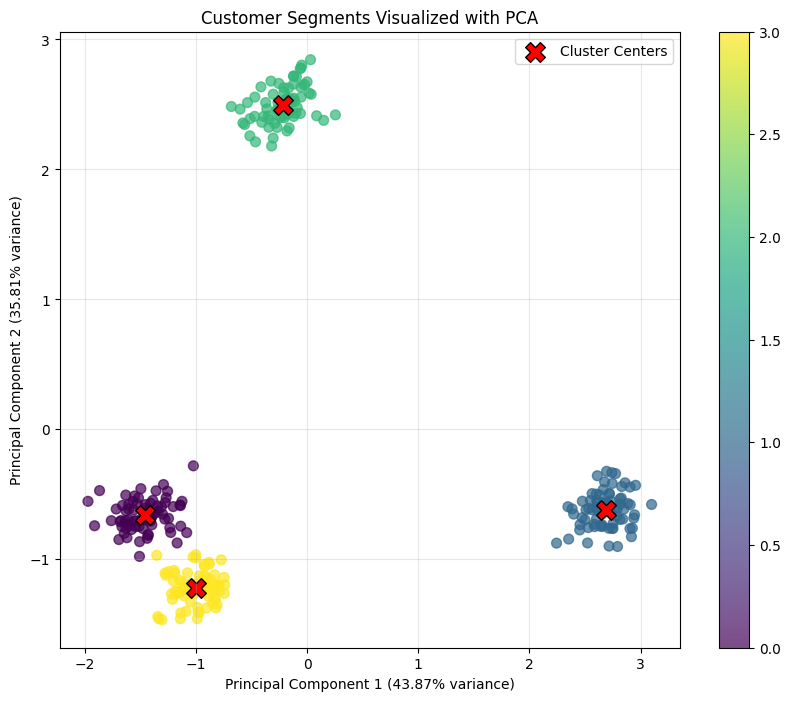

Total variance explained by 2 principal components: 79.68%


In [46]:
# Plot clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(plot_df['PC1'], plot_df['PC2'], c=plot_df['Cluster'], cmap='viridis', alpha=0.7, s=50)
plt.colorbar(scatter)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('Customer Segments Visualized with PCA')
plt.grid(True, alpha=0.3)

# Plot cluster centers in PCA space
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200, label='Cluster Centers', edgecolors='black')
plt.legend()
plt.show()

print(f"Total variance explained by 2 principal components: {pca.explained_variance_ratio_.sum():.2%}")

### 7. Analyze Cluster Characteristics

=== CLUSTER PROFILES ===
              Age    Income  Spending  Frequency   Recency
Cluster                                                   
0       -6.259538 -3.850879  0.485815  -1.256324 -4.223159
1       -9.620695  9.510239  6.750846  -5.551537 -6.271968
2       -6.991023 -8.935675  7.350017   2.077265  4.148295
3       -2.430354  9.019609  4.677078   1.947019 -6.919250


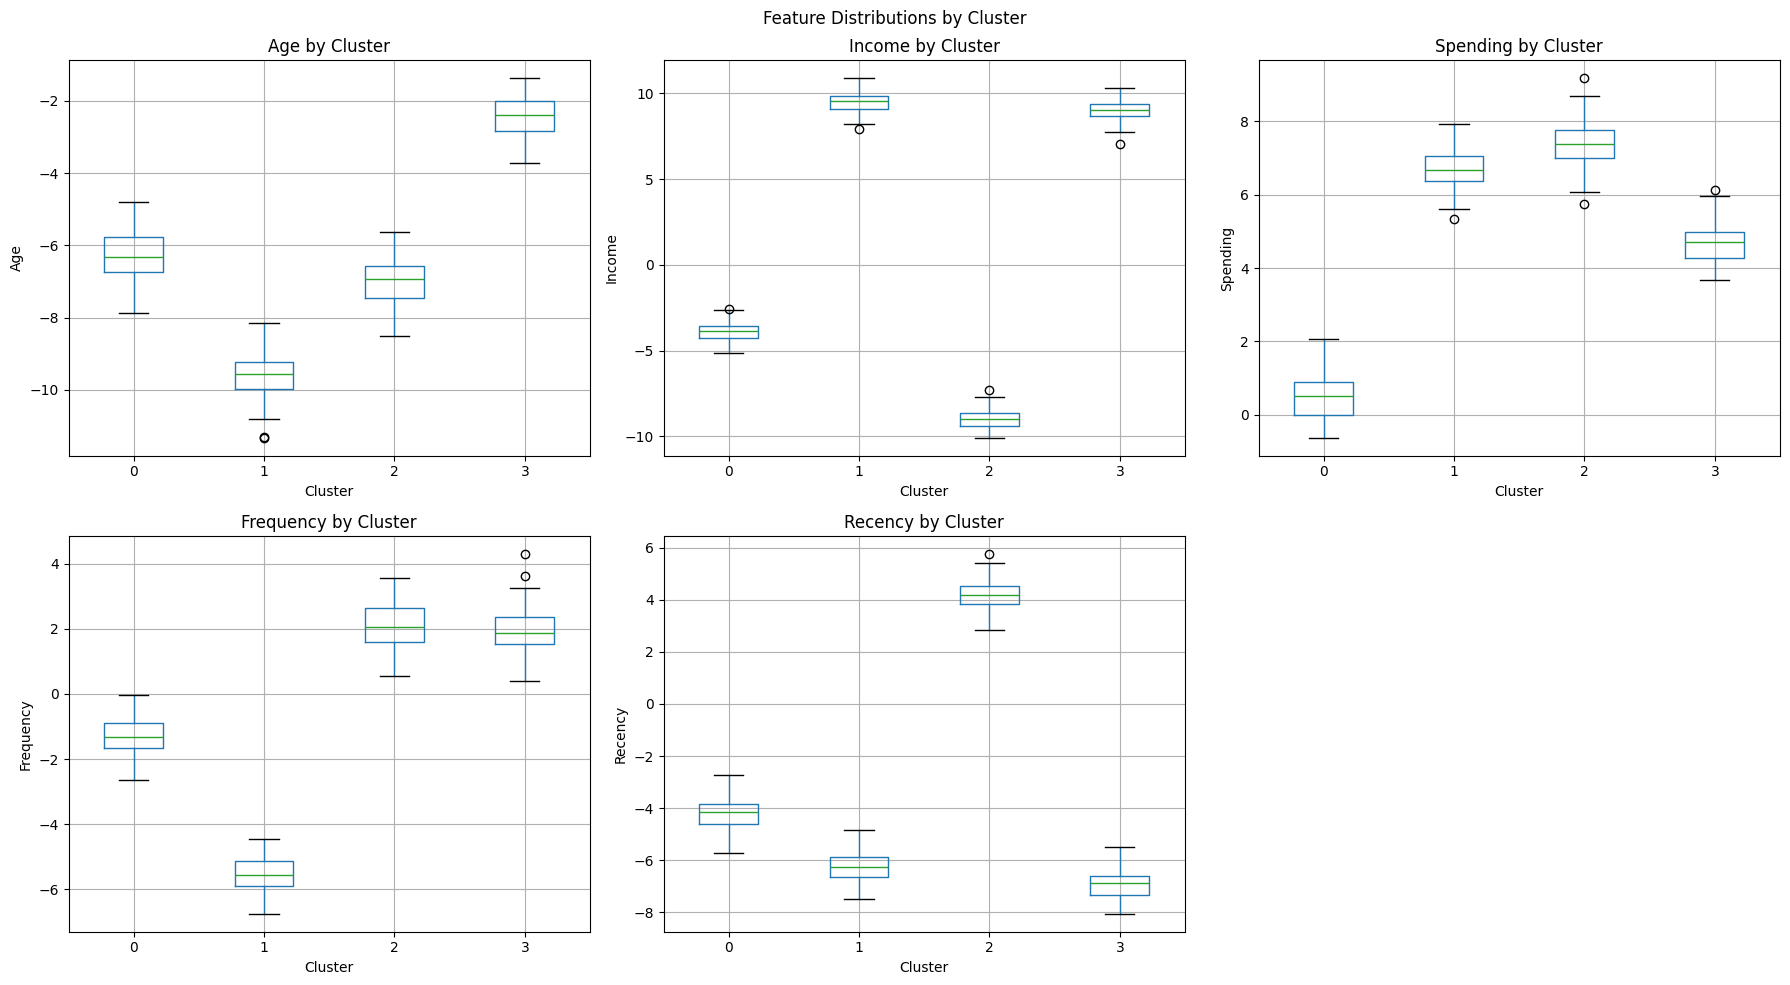

In [47]:
# Analyze cluster profiles
cluster_profiles = customer_data.groupby('Cluster').mean()
cluster_sizes = customer_data.groupby('Cluster').size()

print("=== CLUSTER PROFILES ===")
print(cluster_profiles)

# Visualize cluster characteristics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
features = customer_data.columns[:-1]  # Exclude cluster column

for i, feature in enumerate(features):
    row, col = i // 3, i % 3
    customer_data.boxplot(column=feature, by='Cluster', ax=axes[row, col])
    axes[row, col].set_title(f'{feature} by Cluster')
    axes[row, col].set_ylabel(feature)

# Remove empty subplot
fig.delaxes(axes[1, 2])
plt.suptitle('Feature Distributions by Cluster')
plt.tight_layout()
plt.show()

### 8. Evaluate Cluster Quality

In [48]:
# Comprehensive cluster evaluation
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Calculate multiple metrics
silhouette_avg = silhouette_score(scaled_data, clusters)
calinski_harabasz = calinski_harabasz_score(scaled_data, clusters)
davies_bouldin = davies_bouldin_score(scaled_data, clusters)

print("=== CLUSTER QUALITY METRICS ===")
print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.1f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")
print(f"Within-Cluster Sum of Squares: {kmeans.inertia_:.1f}")

# Interpretation guidelines
print("\n=== INTERPRETATION GUIDELINES ===")
print("Silhouette Score: -1 (worst) to +1 (best)")
print("Calinski-Harabasz: Higher = better separated")
print("Davies-Bouldin: Lower = better separated")

=== CLUSTER QUALITY METRICS ===
Silhouette Score: 0.847
Calinski-Harabasz Index: 3654.1
Davies-Bouldin Index: 0.217
Within-Cluster Sum of Squares: 47.3

=== INTERPRETATION GUIDELINES ===
Silhouette Score: -1 (worst) to +1 (best)
Calinski-Harabasz: Higher = better separated
Davies-Bouldin: Lower = better separated


### 9. Stability Analysis

In [49]:
# Check cluster stability across multiple runs
stability_results = []

for run in range(5):
    kmeans_temp = KMeans(n_clusters=optimal_k, random_state=run, n_init=1)
    clusters_temp = kmeans_temp.fit_predict(scaled_data)
    stability_results.append(clusters_temp)
    
    print(f"Run {run+1}: WCSS = {kmeans_temp.inertia_:.1f}")

print("\nStability: Check if WCSS values are similar across runs")

Run 1: WCSS = 47.3
Run 2: WCSS = 47.3
Run 3: WCSS = 47.3
Run 4: WCSS = 47.3
Run 5: WCSS = 47.3

Stability: Check if WCSS values are similar across runs


### End of Notebook